In [12]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [13]:
pd.set_option('display.max_columns', None)
final_depression = pd.read_csv('data_train_depr.csv')
final_anxiety = pd.read_csv('data_train_anx.csv')
final_stress = pd.read_csv('data_train_str.csv')

display(final_depression, final_anxiety, final_stress)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Condition
0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,2,0,1,0,0,1,0,0,0
2,0,2,2,3,1,3,0,1,3,0,3,0,1,0,1
3,3,3,3,3,3,3,2,3,2,3,3,2,3,3,2
4,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,1,1,1,0,1,1,1,0,1,1,1,1,3,1
16796,2,3,3,3,3,3,2,3,3,3,3,3,3,3,2
16797,0,1,1,1,2,1,2,2,2,1,2,0,1,1,1
16798,0,1,1,0,1,0,0,2,1,0,0,1,0,1,0


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Condition
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,3,1,3,3,1,0,2,3,3,3,2,2
2,0,3,2,2,3,3,3,1,2,2,3,3,2,2,2
3,1,2,0,2,0,1,1,0,2,1,2,1,0,0,0
4,3,1,1,3,3,1,0,3,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,0,1,3,2,1,1,0,0,0,0,1,1,1,0
16796,1,1,0,1,0,1,1,0,1,1,0,1,2,0,0
16797,3,2,3,3,3,3,3,3,3,3,3,3,3,3,2
16798,2,1,1,3,1,1,2,1,1,3,1,2,2,1,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Condition
0,1,1,1,1,1,1,3,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,1
2,0,1,1,1,1,1,0,0,0,2,1,1,2,1,0
3,0,1,3,0,1,0,1,0,0,0,3,0,1,0,0
4,1,1,1,1,0,2,0,1,1,3,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,1,2,0,1,3,0,2,1,0,1,1,1,2,1
16796,1,1,2,0,2,0,2,1,1,3,0,2,2,0,1
16797,1,0,1,1,1,1,1,1,1,1,2,0,1,1,0
16798,1,1,1,3,1,1,1,1,2,3,2,3,2,2,2


In [14]:
#data scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler()
def scalingData(data_source):
  scaler.fit(data_source)
  data_scaled = scaler.transform(data_source)

  data_scaled = pd.DataFrame(data = data_scaled, 
                    index = None, 
                    columns = data_source.columns)
  
  encoder_label =  LabelEncoder()
  data_source['Condition'] = encoder_label.fit_transform(data_source['Condition'])
  
  return data_source


depdata = scalingData(final_depression)
strdata = scalingData(final_stress)
anxdata = scalingData(final_anxiety)

display(anxdata,strdata,depdata)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Condition
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,3,1,3,3,1,0,2,3,3,3,2,2
2,0,3,2,2,3,3,3,1,2,2,3,3,2,2,2
3,1,2,0,2,0,1,1,0,2,1,2,1,0,0,0
4,3,1,1,3,3,1,0,3,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,0,1,3,2,1,1,0,0,0,0,1,1,1,0
16796,1,1,0,1,0,1,1,0,1,1,0,1,2,0,0
16797,3,2,3,3,3,3,3,3,3,3,3,3,3,3,2
16798,2,1,1,3,1,1,2,1,1,3,1,2,2,1,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Condition
0,1,1,1,1,1,1,3,1,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,1
2,0,1,1,1,1,1,0,0,0,2,1,1,2,1,0
3,0,1,3,0,1,0,1,0,0,0,3,0,1,0,0
4,1,1,1,1,0,2,0,1,1,3,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,1,2,0,1,3,0,2,1,0,1,1,1,2,1
16796,1,1,2,0,2,0,2,1,1,3,0,2,2,0,1
16797,1,0,1,1,1,1,1,1,1,1,2,0,1,1,0
16798,1,1,1,3,1,1,1,1,2,3,2,3,2,2,2


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Condition
0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,2,0,1,0,0,1,0,0,0
2,0,2,2,3,1,3,0,1,3,0,3,0,1,0,1
3,3,3,3,3,3,3,2,3,2,3,3,2,3,3,2
4,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,1,1,1,1,0,1,1,1,0,1,1,1,1,3,1
16796,2,3,3,3,3,3,2,3,3,3,3,3,3,3,2
16797,0,1,1,1,2,1,2,2,2,1,2,0,1,1,1
16798,0,1,1,0,1,0,0,2,1,0,0,1,0,1,0


In [15]:
YDepression = pd.get_dummies(depdata['Condition']).values
XDepression =  depdata.iloc[:,0:14].values

YStress = pd.get_dummies(strdata['Condition']).values
XStress = strdata.iloc[:,0:14].values

YAnxiety = pd.get_dummies(anxdata['Condition']).values
XAnxiety = anxdata.iloc[:,0:14].values

# X_train_depression = scaler.fit_transform(X_train_depression)
# X_test_depression = scaler.transform(X_test_depression)
# X_train_anxiety = scaler.fit_transform(X_train_anxiety)
# X_test_anxiety = scaler.transform(X_test_anxiety)
# X_train_stress = scaler.fit_transform(X_train_stress)
# X_test_stress = scaler.transform(X_test_stress)

#data split
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(XDepression, YDepression, test_size=0.2, random_state=0)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(XStress, YStress, test_size=0.2, random_state=0)
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(XAnxiety, YAnxiety, test_size=0.2, random_state=0)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [17]:
def build_model(train_data, label_data):
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation = 'relu',input_shape=(14,), name ="Input"), 
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),     #CategoricalCrossentropy
              metrics=['accuracy'])

    model.fit(X_train_depression, y_train_depression, batch_size=32, epochs=20)

    return model

In [18]:
model_dep  = build_model(X_train_depression, y_train_depression)
model_anx = build_model(X_train_anxiety, y_train_anxiety)
model_str = build_model(X_train_stress, y_train_stress)


Epoch 1/20


d:\Python\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)

KeyboardInterrupt



In [ ]:
lossDepression, accuracyDepresion = model_dep.evaluate(X_test_depression, y_test_depression, verbose = 0)
lossStress, accuracyStress = model_str.evaluate(X_test_stress, y_test_stress, verbose = 0)
lossAnxiety, accuracyAnxiety = model_anx.evaluate(X_test_anxiety, y_test_anxiety, verbose = 0)

print('Test Loss Depression : ', lossDepression)
print('Test Loss Depression : ', accuracyDepresion)
print('------------')
print('Test Loss Depression : ', lossStress)
print('Test Loss Depression : ', accuracyStress)
print('------------')
print('Test Loss Depression : ', lossAnxiety)
print('Test Loss Depression : ', accuracyAnxiety)

Test Loss Depression :  0.06574476510286331
Test Loss Depression :  0.9729166626930237
------------
Test Loss Depression :  0.02357563003897667
Test Loss Depression :  0.9907737970352173
------------
Test Loss Depression :  0.04254491627216339
Test Loss Depression :  0.9821428656578064


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

def show_confusion_matrix(model, test_data, label_data, title):
  # Counting accuracy from validation data
  predicted_class = np.argmax(model.predict(test_data), axis=1)
  print('Accuracy : ', accuracy_score(np.argmax(label_data, axis=1), predicted_class))

  # Check sum of each value prediction
  data_predicted = pd.DataFrame(predicted_class, columns=["prediction"])
  data_predicted=data_predicted.reset_index()
  print('---------------')
  print(data_predicted['prediction'].value_counts())

  # Confusion Matrix
  cm=confusion_matrix(np.argmax(label_data, axis=1), predicted_class)
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Normal','Predicted: Moderate','Predicted: Severe'],
                                          index=['Actual: Normal','Actual: Moderate','Actual: Severe'])

  plt.figure(figsize = (8,5))
  sns.heatmap(conf_matrix, annot=True,fmt='d')
  plt.title("{} PREDICTION".format(title))
  plt.xticks(rotation=0)
  plt.yticks(rotation=360)
  plt.show()

  tes_pred = model.predict(test_data)
  # Accuracy
  print("-"*100)
  print("Accuracy Score for {}:".format(title),accuracy_score(np.argmax(label_data, axis=1), np.argmax(tes_pred, axis=1)))
  print("-"*100)
  print("\n")
  print("classification report for {} :\n\n".format(title), classification_report(np.argmax(label_data, axis=1), np.argmax(tes_pred, axis=1)))
  print("-"*100)

105/105 [==============================] - 2s 8ms/step
Accuracy :  0.9904761904761905
---------------
2    1158
0    1102
1    1100
Name: prediction, dtype: int64


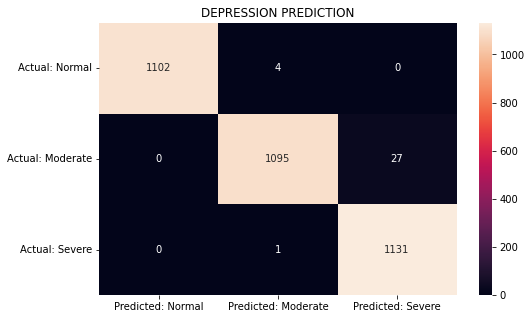

105/105 [==============================] - 2s 11ms/step
----------------------------------------------------------------------------------------------------
Accuracy Score for DEPRESSION: 0.9904761904761905
----------------------------------------------------------------------------------------------------


classification report for DEPRESSION :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1106
           1       1.00      0.98      0.99      1122
           2       0.98      1.00      0.99      1132

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360

----------------------------------------------------------------------------------------------------


In [ ]:
show_confusion_matrix(model_dep, X_test_depression, y_test_depression, 'DEPRESSION')

105/105 [==============================] - 1s 9ms/step
Accuracy :  0.9788690476190476
---------------
1    1196
0    1114
2    1050
Name: prediction, dtype: int64


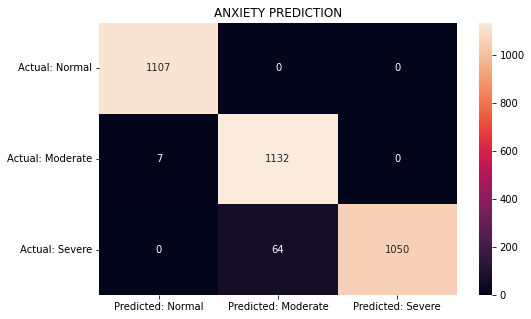

105/105 [==============================] - 1s 9ms/step
----------------------------------------------------------------------------------------------------
Accuracy Score for ANXIETY: 0.9788690476190476
----------------------------------------------------------------------------------------------------


classification report for ANXIETY :

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1107
           1       0.95      0.99      0.97      1139
           2       1.00      0.94      0.97      1114

    accuracy                           0.98      3360
   macro avg       0.98      0.98      0.98      3360
weighted avg       0.98      0.98      0.98      3360

----------------------------------------------------------------------------------------------------


In [ ]:
show_confusion_matrix(model_anx, X_test_anxiety, y_test_anxiety, 'ANXIETY')

105/105 [==============================] - 2s 9ms/step
Accuracy :  0.9892857142857143
---------------
1    1189
0    1104
2    1067
Name: prediction, dtype: int64


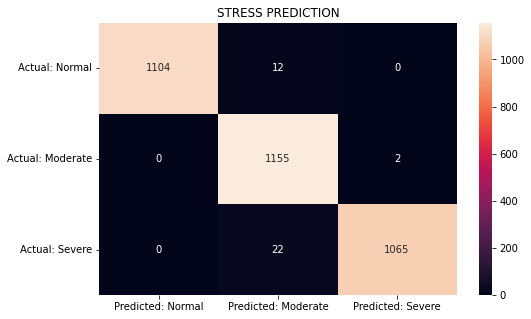

105/105 [==============================] - 3s 17ms/step
----------------------------------------------------------------------------------------------------
Accuracy Score for STRESS: 0.9892857142857143
----------------------------------------------------------------------------------------------------


classification report for STRESS :

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1116
           1       0.97      1.00      0.98      1157
           2       1.00      0.98      0.99      1087

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360

----------------------------------------------------------------------------------------------------


In [ ]:
show_confusion_matrix(model_str, X_test_stress, y_test_stress, 'STRESS')

In [19]:
depression_validation = pd.read_csv('data_valid_depr.csv')
anxiety_validation = pd.read_csv('data_valid_anx.csv')
stress_validation = pd.read_csv('data_valid_str.csv')

display(depression_validation, anxiety_validation, stress_validation)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Condition
0,1,1,2,1,1,1,1,1,1,1,0,1,2,1,1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,1,1,1,2,2,1,1,1,2,1,3,2,1
3,1,1,2,1,1,1,1,0,1,1,3,3,3,0,1
4,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,1,1,1,1,0,1,0,1,1,2,1,1,0,1,0
4196,1,1,1,1,0,1,2,1,1,1,2,1,2,1,1
4197,2,3,3,3,2,2,3,2,2,2,3,3,2,0,2
4198,2,1,1,1,2,0,2,2,1,1,0,2,2,1,1


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Condition
0,2,0,1,1,0,0,0,0,3,1,3,2,3,1,1
1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,3,1,0,1,0,3,3,2,3,3,1,2
3,0,1,0,1,0,0,0,0,0,0,2,1,0,0,0
4,1,0,1,3,1,1,2,1,2,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,3,3,3,3,2,3,3,3,3,2,3,3,3,3,2
4196,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0
4197,0,0,0,3,0,2,1,0,2,1,1,0,3,1,1
4198,0,3,3,3,1,3,2,1,3,3,3,3,3,1,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Condition
0,1,1,3,2,1,1,0,3,2,1,2,2,1,2,2
1,1,1,0,1,1,1,0,1,1,1,2,1,1,1,0
2,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0
3,2,2,0,2,0,1,2,0,1,1,0,1,1,2,1
4,0,1,1,2,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0,0,0,1,0,2,1,0,0,0,1,1,1,1,0
4196,3,3,3,2,1,3,0,0,3,3,1,2,0,1,2
4197,3,1,1,3,1,3,3,0,0,1,1,0,2,0,1
4198,1,0,1,1,1,1,1,1,2,1,1,2,1,1,1


In [20]:
index=2
X_hasil_depression = depression_validation.copy()
X_hasil_depression=X_hasil_depression = X_hasil_depression.iloc[:,0:14]#.values
X_hasil_depression=X_hasil_depression.loc[index].values
X_hasil_depression=np.array(X_hasil_depression).astype('float32').reshape((1,-1))
print(X_hasil_depression, depression_validation.loc[index,["Condition"]])

X_hasil_anxiety = anxiety_validation.copy()
X_hasil_anxiety=X_hasil_anxiety = X_hasil_anxiety.iloc[:,0:14]#.values
X_hasil_anxiety=X_hasil_anxiety.loc[index].values
X_hasil_anxiety=np.array(X_hasil_anxiety).astype('float32').reshape((1,-1))
print(X_hasil_anxiety, anxiety_validation.loc[index,["Condition"]])

X_hasil_stress = stress_validation.copy()
X_hasil_stress=X_hasil_stress = X_hasil_stress.iloc[:,0:14]#.values
X_hasil_stress=X_hasil_stress.loc[index].values
X_hasil_stress=np.array(X_hasil_stress).astype('float32').reshape((1,-1))
print(X_hasil_stress, stress_validation.loc[index,["Condition"]])

[[1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 3. 2.]] Condition    1
Name: 2, dtype: int64
[[1. 0. 0. 3. 1. 0. 1. 0. 3. 3. 2. 3. 3. 1.]] Condition    2
Name: 2, dtype: int64
[[1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.]] Condition    0
Name: 2, dtype: int64


In [21]:
hasil_akhir_depression = model_dep.predict(X_hasil_depression)
hasil_akhir_anxiety = model_anx.predict(X_hasil_anxiety)
hasil_akhir_stress = model_str.predict(X_hasil_stress)

print('Tingkat depresi: ',hasil_akhir_stress)
print('Tingkat depresi: ',np.argmax(hasil_akhir_depression))
print('Tingkat anxiety: ',np.argmax(hasil_akhir_anxiety))
print('Tingkat stress: ',np.argmax(hasil_akhir_stress))

1/1 [==============================] - 1s 1s/step
Tingkat depresi:  [[1.000000e+00 1.793667e-24 0.000000e+00]]
Tingkat depresi:  1
Tingkat anxiety:  2
Tingkat stress:  0


# Model Save JSON

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model_dep, 'Model_Depression_js')
tfjs.converters.save_keras_model(model_anx, 'Model_Anxiety_js')
tfjs.converters.save_keras_model(model_str, 'Model_Stress_js')